In [80]:
# McCall Labor Search Model with Seperation
# Each period jobs can be lost, and there may be no offer.
# Problem: accept or reject wage
# Wage offers follow a fixed known distribution, w ~ F

# Structural Parameters
b = 5 # unemployment benefit if wage unaccepted
β = 0.99 # patience
γ = 0.9 # risk aversion
μ = 100 # mean wage offer
σ = 10 # variance wage offer
α = 0.2 # job loss probability
δ = 0.1 # wage offer probability

# V(w) is lifetime utility if employed = u(w) + β(1-α)V(w) + βαU(w)
# U(w) is lifetime utility if unemployed = u(c) + β(1-δ)U(w) + βδE[max(U(w),V(w))]  

# Functions
u(c, γ=1/2) = c^(1-γ)/(1-γ) # CARA Utility function
uinv(U, γ=1/2) = ((1-γ)*U)^(1/(1-γ)) # inverse utility

# Wage and Value Placeholder Grids
N = 1000
LB = 1
UB = 200
W = range(LB, UB, N)
V = u.(W,γ)/(1-β) # initial guess
U = u(b,γ) # initial guess

using NLsolve, Plots, Distributions, LinearAlgebra
function reservationWage(b, β, γ, α, δ, μ, σ; N = 1000)
    W = range(μ-3*σ, μ+3*σ, N) # wage grid
    W = range(1, 200, N) # wage grid
    V = [u(w, γ)/(1-β) for w in W] # initial value function for "employed"
    U = u(b,γ) # initial value function for "unemployed"
    F = Normal(μ,σ)
    P = pdf.(F, W)/sum(pdf.(F, W))
    E(W) = dot(P, W)
    
    function T(x)
        V = x[1:end-1]
        U = x[end]
       return [u.(W, γ) + β*(1-α)*V .+ β*α*U ; u(b, γ) + β*(1-δ)*U + β*δ*E(max.(U, V))] 
    end
    
    x = fixedpoint(T, [V ; U]).zero # value function iteration
    V = x[1:end-1]
    U = x[end]
    
    w̄_i = searchsortedfirst(V .- U, 0.0)
    w̄ = W[w̄_i]
    return V, U, w̄
end

V, U, w̄ = reservationWage(b, β, γ, α, δ, μ, σ);

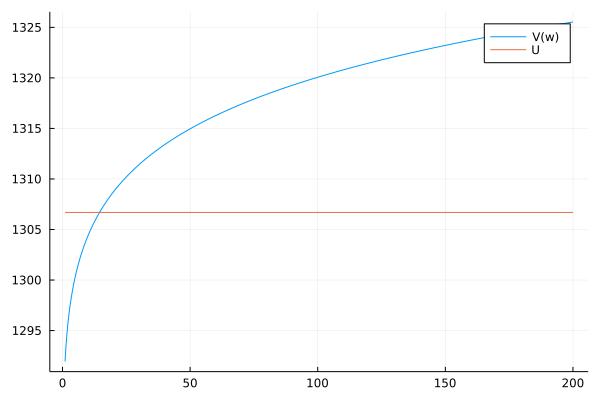

In [85]:
plot(W, V, label = "V(w)") # distribution of wages
plot!(W, fill(U, length(W)), label = "U") # distribution of wages

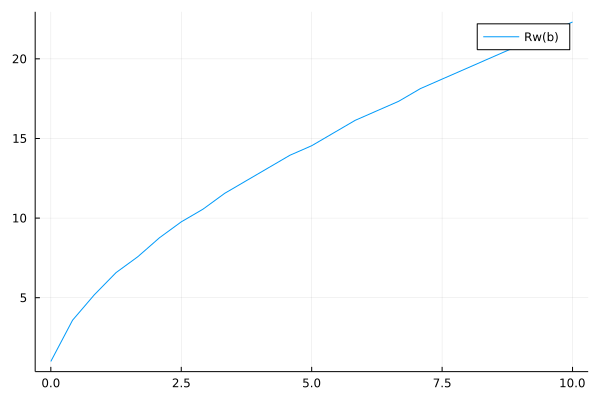

In [94]:
# Effect of Benefits on Reservation Wage
b_vals = range(0, 10.0, 25)
p1 = plot(b_vals, [reservationWage(b, β, γ, α, δ, μ, σ)[3] for b in b_vals], label = "Rw(b)")

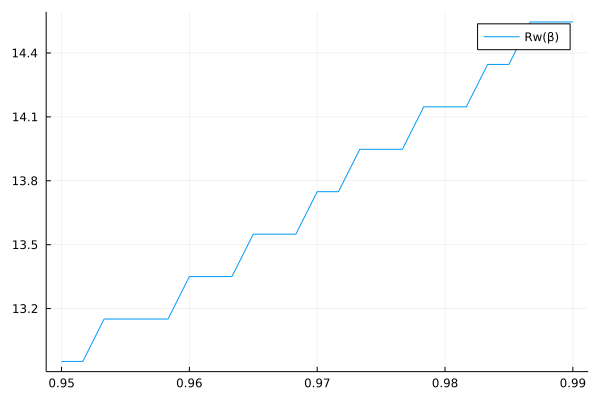

In [87]:
# Effect of Patience on Reservation Wage
β_vals = range(0.95, 0.99, 25)
p2 = plot(β_vals, [reservationWage(b, β, γ, α, δ, μ, σ)[3] for β in β_vals], label = "Rw(β)")

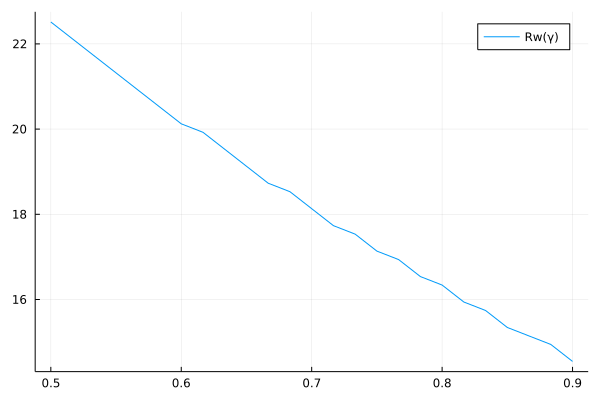

In [88]:
# Effect of Risk Aversion on Reservation Wage
γ_vals = range(0.5, 0.9, 25)
plot(γ_vals, [reservationWage(b, β, γ, α, δ, μ, σ)[3] for γ in γ_vals], label = "Rw(γ)")

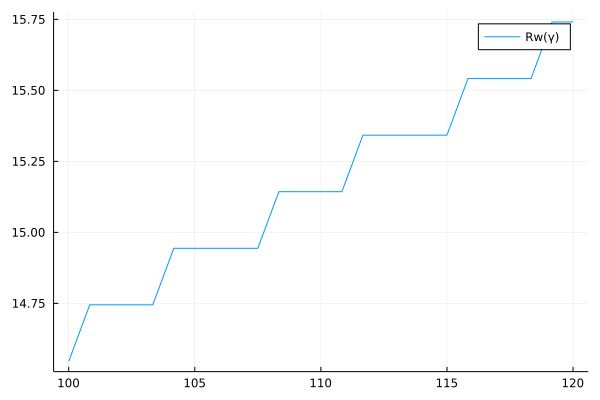

In [90]:
# Effect of Average Wage on Reservation Wage
μ_vals = range(100, 120, 25)
plot(μ_vals, [reservationWage(b, β, γ, α, δ, μ, σ)[3] for μ in μ_vals], label = "Rw(γ)")

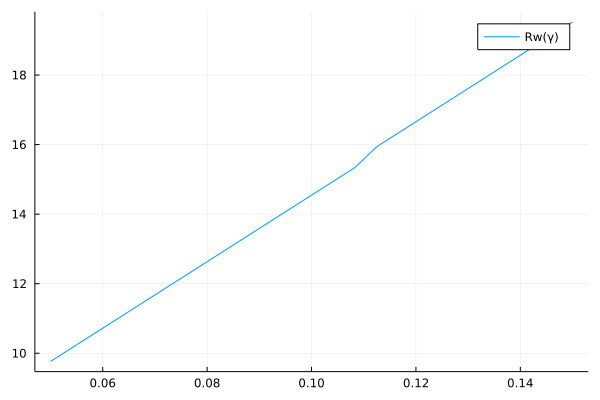

In [91]:
# Effect of Wage Offer Probability on Reservation Wage
δ_vals = range(0.05, 0.15, 25)
plot(δ_vals, [reservationWage(b, β, γ, α, δ, μ, σ)[3] for δ in δ_vals], label = "Rw(γ)")

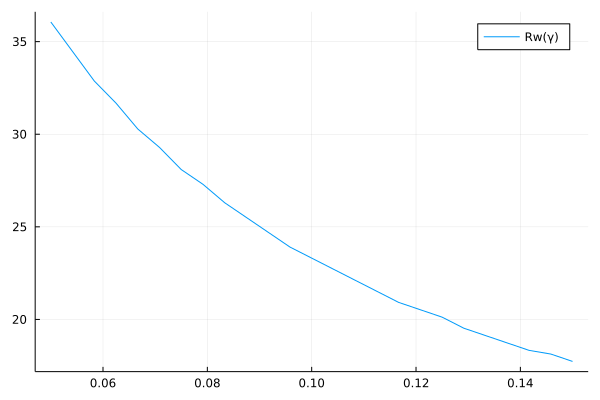

In [93]:
# Effect of Job Loss Probability on Reservation Wage
α_vals = range(0.05, 0.15, 25)
plot(α_vals, [reservationWage(b, β, γ, α, δ, μ, σ)[3] for α in α_vals], label = "Rw(γ)")